In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as datetime
from matplotlib import dates
from scipy import signal
import os
from pathlib import Path
print(Path.cwd())
Path = Path.cwd()

/Users/cbrun/Documents/PROJETS/GC2021/COBRA_fev2023/GRAND_COLON_2023


In [3]:
DIR='MERCREDI_08_FEV_23h'
file0='me08_23h02'
#DIR='LUNDI_13_FEV_9h'
#file0='l13_09h21'
#DIR='LUNDI_13_FEV_7h'
#file0='l13_07h13'
#DIR='DIMANCHE_12_FEV_19h'
#file0='d12_19h18'
#DIR='SAMEDI_11_FEV_9h'
#file0='s11_09h37'
#DIR='SAMEDI_11_FEV_7h'
#file0='s11_07h27'
#DIR='VENDREDI_10_FEV_22h'
#file0='v10_22h42'
#DIR='MERCREDI_08_FEV_19h'
#file0='me08_19h28'
Path=Path/DIR
Files = [(file) for file in sorted(os.listdir(Path))]
#files = [filename for filename in os.listdir('.') if filename.startswith("field2_13.010.1d")]
#files.sort()
#print(files)
print(Files)
n = len(Files)
print(n)
print(Path)
#    pd.read_csv(Files[0], header = 0, low_memory=False)) # pour des fichiers de longueurs égales

['me22h11_y_900.csv', 'me22h14_y_800.csv', 'me22h16_y_700.csv', 'me22h17_y_600.csv', 'me22h19_y_500.csv', 'me22h21_y_400.csv', 'me22h23_y_350.csv', 'me22h24_y_260.csv', 'me22h24_y_300.csv', 'me22h27_y_230.csv', 'me22h29_y_200.csv', 'me22h31_y_180.csv', 'me22h32_y_160.csv', 'me22h34_y_130.csv', 'me22h35_y_100.csv', 'me22h37_y_080.csv', 'me22h39_y_060.csv', 'me22h42_y_040.csv', 'me22h44_y_030.csv', 'me22h46_y_020.csv', 'me22h47_y_015.csv', 'me22h49_y_010.csv', 'me22h51_y_008.csv', 'me22h52_y_006.csv', 'me22h54_y_005.csv', 'me22h55_y_004.csv', 'me22h57_y_003.csv', 'me22h58_y_002.csv', 'me23h00_y_001.csv', 'me23h02_y_000.csv']
30
/Users/cbrun/Documents/PROJETS/GC2021/COBRA_fev2023/GRAND_COLON_2023/MERCREDI_08_FEV_23h


In [4]:
#DATA GC COBRA fevrier 2023
freq=1250
N=75264
datarate = np.zeros(n) 
umean = np.zeros(n)
vmean = np.zeros(n)
wmean = np.zeros(n)
ukat2 = np.zeros(n)
ukat = np.zeros(n)
vkat = np.zeros(n)
wkat = np.zeros(n)
alpha = np.zeros(n)
beta = np.zeros(n)
urms = np.zeros(n)
vrms = np.zeros(n)
wrms = np.zeros(n)
uw = np.zeros(n)
uv = np.zeros(n)
vw = np.zeros(n)
#
for j in range(n): 
    file_path = Path/Files[j]
    print(file_path)
    data_meteo = pd.read_csv(file_path, header=0)[0::]
    u_x = data_meteo['u'].astype(float) #
    u_z = data_meteo['v'].astype(float) #
    u_y = data_meteo['w'].astype(float) #
    print(data_meteo)
    u = []
    v = []
    w = []
    Nmax=0
    un=np.sqrt(u_x**2+u_y**2+u_z**2)
    for i in range(N-1):
        if  un[i]!=0.0: 
            Nmax=Nmax+1
            u.append(u_x[i])
            v.append(u_y[i])
            w.append(u_z[i])       
    tmax=Nmax/freq
    datarate[j]=Nmax/N
    time=np.linspace(0, tmax, num=Nmax)
#    time_meteo=pd.DataFrame({'year': [2023], 'month': [2] , 'day': [13], 
#                             'hour': [9],  'minute': [21+n], 'second': time })
    print(Nmax)
    #print(np.shape(u))
    #print(np.shape(time))
    umean[j]=np.mean(u)
    vmean[j]=np.mean(v)
    wmean[j]=np.mean(w)
#    beta=5./180.*np.pi
# STREAMLINES!!!
    beta[j]=np.arctan(wmean[j]/umean[j])
# Repere vertical Elcom
    beta[j]=0.
    beta[j]=10./180.*np.pi
#    beta=np.arctan(wmean[0]/umean[0])
#    beta=np.arctan(wmean[20]/umean[20])
#print(beta*180/np.pi)
    wkat[j]=-umean[j]*np.sin(beta[j])+wmean[j]*np.cos(beta[j])
    ukat2[j]=umean[j]*np.cos(beta[j])+wmean[j]*np.sin(beta[j])
    alpha[j]=np.arctan(vmean[j]/ukat2[j])
#print(alpha*180/np.pi)
#alpha=0.
    vkat[j]=-ukat2[j]*np.sin(alpha[j])+vmean[j]*np.cos(alpha[j])
    ukat[j]=ukat2[j]*np.cos(alpha[j])+vmean[j]*np.sin(alpha[j])
    uk = np.zeros(Nmax)
    uk2 = np.zeros(Nmax)
    vk = np.zeros(Nmax)
    wk = np.zeros(Nmax)
    for i in range(Nmax):
        wk[i]=-u[i]*np.sin(beta[j])+w[i]*np.cos(beta[j])
        uk2[i]=u[i]*np.cos(beta[j])+w[i]*np.sin(beta[j])
        vk[i]=-uk2[i]*np.sin(alpha[j])+v[i]*np.cos(alpha[j])
        uk[i]=uk2[i]*np.cos(alpha[j])+v[i]*np.sin(alpha[j])
    #
    ukmean=np.mean(uk)
    vkmean=np.mean(vk)
    wkmean=np.mean(wk)
    up=uk-ukmean
    vp=vk-vkmean
    wp=wk-wkmean
    u2=np.mean(up**2)
    v2=np.mean(vp**2)
    w2=np.mean(wp**2)
    urms[j]=np.sqrt(u2)
    vrms[j]=np.sqrt(v2)
    wrms[j]=np.sqrt(w2)
    uw[j]=np.mean(up*wp)
    uv[j]=np.mean(up*vp)
    vw[j]=np.mean(vp*wp)
print('beta=',beta*180/np.pi)
print('alpha=',alpha*180/np.pi)
#print(vmean)
#print(wmean)

/Users/cbrun/Documents/PROJETS/GC2021/COBRA_fev2023/GRAND_COLON_2023/MERCREDI_08_FEV_23h/me22h11_y_900.csv
              u         v         w
0      3.175030  0.268548 -1.630342
1      3.172434  0.237701 -1.612926
2      3.140428  0.267307 -1.648023
3      3.097686  0.272716 -1.667816
4      3.089924  0.306985 -1.677413
...         ...       ...       ...
75259  2.193981  0.372186 -1.987580
75260  2.146729  0.436463 -1.962747
75261  2.230078  0.346302 -1.993933
75262  2.144710  0.475271 -1.879618
75263  2.466701  0.099315 -2.095411

[75264 rows x 3 columns]
74160
/Users/cbrun/Documents/PROJETS/GC2021/COBRA_fev2023/GRAND_COLON_2023/MERCREDI_08_FEV_23h/me22h14_y_800.csv
              u         v         w
0      2.798163  0.154330 -0.894534
1      2.761079  0.152893 -0.900382
2      2.768839  0.151322 -0.893151
3      2.737705  0.148516 -0.899817
4      2.765236  0.146002 -0.902665
...         ...       ...       ...
75259  3.336621  0.254351 -1.559566
75260  3.431395  0.230313 -1.55446

73658
/Users/cbrun/Documents/PROJETS/GC2021/COBRA_fev2023/GRAND_COLON_2023/MERCREDI_08_FEV_23h/me22h37_y_080.csv
              u         v         w
0      2.395097 -0.067031 -1.912626
1      2.363038  0.002310 -2.047069
2      2.357891 -0.008044 -2.046653
3      2.323112  0.067947 -2.138698
4      2.315563  0.029147 -2.073144
...         ...       ...       ...
75259  2.838167  0.020524 -1.538360
75260  2.791528  0.041681 -1.612103
75261  2.807309  0.011125 -1.603908
75262  2.789430 -0.021383 -1.806010
75263  2.701747 -0.055328 -1.581501

[75264 rows x 3 columns]
73189
/Users/cbrun/Documents/PROJETS/GC2021/COBRA_fev2023/GRAND_COLON_2023/MERCREDI_08_FEV_23h/me22h39_y_060.csv
              u         v         w
0      2.593797  0.120206 -1.438664
1      2.572697  0.089660 -1.408174
2      2.598354  0.106377 -1.406761
3      2.562395  0.088712 -1.356617
4      2.551418  0.109032 -1.373910
...         ...       ...       ...
75259  2.241316 -0.065576 -1.936942
75260  2.326900 -0.126095 -1

In [5]:
#rangement ordre croissant depuis la paroi (si necessaire)
datarate=np.flip(datarate)
alpha=np.flip(alpha)
beta=np.flip(beta)
umean=np.flip(umean)
vmean=np.flip(vmean)
wmean=np.flip(wmean)
ukat=np.flip(ukat)
vkat=np.flip(vkat)
wkat=np.flip(wkat)
uw=np.flip(uw)
vw=np.flip(vw)
uv=np.flip(uv)
urms=np.flip(urms)
vrms=np.flip(vrms)
wrms=np.flip(wrms)
print('alpha=',alpha/np.pi*180)
print('beta=',beta/np.pi*180)
print('DR=',datarate)

alpha= [-33.37351598 -39.1891481  -41.70674713 -43.19966342 -44.57019669
 -44.36178729 -44.40239678 -45.04484465 -43.2252735  -40.44152663
 -40.51412618 -39.94864085 -35.61111426 -34.31577669 -32.48706292
 -36.17829581 -33.09341548 -35.52761354 -31.56093706 -35.63392433
 -33.94193901 -29.98933224 -32.73006711 -28.96972693 -33.5315388
 -30.25569738 -31.2395347  -30.76513753 -25.17162708 -32.89936175]
beta= [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
DR= [0.6149155  0.41115274 0.19517963 0.14738786 0.06825308 0.05974968
 0.06526361 0.0835592  0.22917995 0.58605708 0.6114477  0.7235996
 0.95101244 0.97450308 0.97243038 0.97866178 0.99901679 0.9803226
 0.97766528 0.97658907 0.98276733 0.99998671 0.9982196  0.99988042
 0.97902051 0.99982727 0.99998671 0.99909651 0.99998671 0.98533163]


In [6]:
#SAUVEGARDE NETCDF
#31 points avec z50
zcobra = np.zeros(n)
zcobra=[0,1,2,3,4,5,6,8,10,15,20,30,40,60,80,100,130,160,180,200,230,300,260,350,400,500,600,700,800,900]
#22 points avec z50
#zcobra=[0,5,10,15,20,30,40,50,60,80,100,130,160,200,250,300,400,500,600,700,800,900]
#21 points sans z50
#zcobra=[0,5,10,15,20,30,40,60,80,100,130,160,200,250,300,400,500,600,700,800,900]
#20 points sans z60
#zcobra=[0,5,10,15,20,30,40,80,100,130,160,200,250,300,400,500,600,700,800,900]
zcobra=pd.to_numeric(zcobra)
# zcobra en m
#zcobra=(zcobra+2)/1000
theta=30
theta=theta/180*np.pi
zcobra=(np.array(zcobra)+2)*np.cos(theta)/1000
#
#file0='me08_19h28'
file_path = file0+"_beta10.nc"
#file_path = file0+"_streamline.nc"
#file_path = file0+"_.nc"
ds = nc.Dataset(file_path, 'w', format='NETCDF4')
ds.createDimension('z', n)

zc= ds.createVariable('z', 'f8', ('z',))
dr= ds.createVariable('dr', 'f8', ('z',))
a= ds.createVariable('alpha', 'f8', ('z',))
b= ds.createVariable('beta', 'f8', ('z',))
uc = ds.createVariable('umean', 'f8', ('z',))
vc  = ds.createVariable('vmean', 'f8', ('z',))
wc  = ds.createVariable('wmean', 'f8', ('z',))
ua = ds.createVariable('ukat', 'f8', ('z',))
va = ds.createVariable('vkat', 'f8', ('z',))
wa = ds.createVariable('wkat', 'f8', ('z',))
ur = ds.createVariable('urms', 'f8', ('z',))
vr = ds.createVariable('vrms', 'f8', ('z',))
wr = ds.createVariable('wrms', 'f8', ('z',))
uwf = ds.createVariable('uw', 'f8', ('z',))
vwf = ds.createVariable('vw', 'f8', ('z',))
uvf = ds.createVariable('uv', 'f8', ('z',))

zc[:] = zcobra
dr[:] = datarate
a[:] = alpha
b[:] = beta
uc[:] = umean
vc[:] = vmean
wc[:] = wmean
ua[:] = ukat
va[:] = vkat
wa[:] = wkat
ur[:] = urms
vr[:] = vrms
wr[:] = wrms
uwf[:] = uw
vwf[:] = vw
uvf[:] = uv

ds.close()

In [7]:
#file1=file0+"_streamline"
file1=file0+"_beta0"
file1=file0+"_beta10"
file_path = file1+".nc"
r3 = nc.Dataset(file_path, 'r', format='NETCDF4')
print(r3)
print(r3['z'][:])
print(r3['umean'][:])
#time_meteo=r3['time'][:]
zcobra=r3['z'][:]
datarate=r3['dr'][:]
alpha=r3['alpha'][:]
beta=r3['beta'][:]
umean=r3['umean'][:]
vmean=r3['vmean'][:]
wmean=r3['wmean'][:]
ukat=r3['ukat'][:]
vkat=r3['vkat'][:]
wkat=r3['wkat'][:]
urms=r3['urms'][:]
vrms=r3['vrms'][:]
wrms=r3['wrms'][:]
uw=r3['uw'][:]
vw=r3['vw'][:]
uv=r3['uv'][:]
print(ukat)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): z(30)
    variables(dimensions): float64 z(z), float64 dr(z), float64 alpha(z), float64 beta(z), float64 umean(z), float64 vmean(z), float64 wmean(z), float64 ukat(z), float64 vkat(z), float64 wkat(z), float64 urms(z), float64 vrms(z), float64 wrms(z), float64 uw(z), float64 vw(z), float64 uv(z)
    groups: 
[0.00173205 0.00259808 0.0034641  0.00433013 0.00519615 0.00606218
 0.0069282  0.00866025 0.0103923  0.01472243 0.01905256 0.02771281
 0.03637307 0.05369358 0.07101408 0.08833459 0.11431535 0.14029612
 0.15761662 0.17493713 0.20091789 0.26153967 0.22689866 0.30484094
 0.34814221 0.43474475 0.52134729 0.60794983 0.69455237 0.78115491]
[1.14741829 1.26799861 1.31473562 1.5036342  1.60745024 1.57770041
 1.91073252 2.01085527 1.99314306 1.85219807 2.22336848 2.1857464
 2.24019524 2.16055465 2.43708289 2.35605544 2.39186949 2.55992786
 2.26866932 2.24747206 2.45287183 2.6694661  

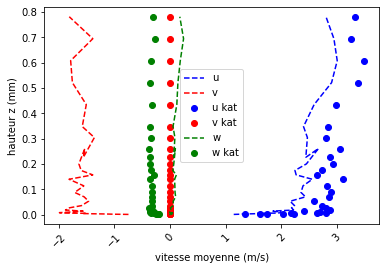

In [8]:
#file0='l13_07h13_mean'
#zcobra=zcobra+2.
#print(zcobra)
#print(np.shape(umean))
#beta=5./180.*np.pi
#beta=np.arctan(wmean[0]/umean[0])
#print(beta*180/np.pi)
#wkat=-umean*np.sin(beta)+wmean*np.cos(beta)
#ukat2=umean*np.cos(beta)+wmean*np.sin(beta)
#alpha=np.arctan(vmean/ukat2)
#print(alpha*180/np.pi)
#alpha=0.
#vkat=-ukat2*np.sin(alpha)+vmean*np.cos(alpha)
#ukat=ukat2*np.cos(alpha)+vmean*np.sin(alpha)
#beta=np.arctan(wmean/ukat)
#gamma=np.arctan(wmean/vmean)
#beta=0.
#wkat=-ukat*np.sin(beta)+np.array(w)*np.cos(beta)
#ukat2=ukat*np.cos(beta)+np.array(w)*np.sin(beta)
file_path = file0+"_mean.pdf"
fig = plt.figure()
plt.plot(umean,zcobra,'b--', label='u')
plt.plot(vmean,zcobra,'r--', label='v')
plt.plot(ukat,zcobra,'bo', label='u kat')
plt.plot(vkat,zcobra,'ro', label='v kat')
plt.plot(wmean,zcobra,'g--', label='w')
plt.plot(wkat,zcobra,'go', label='w kat')
plt.xlabel('vitesse moyenne (m/s)')
plt.ylabel('hauteur z (mm)')
plt.legend()
plt.xticks(rotation=45)
fig.savefig(file_path, bbox_inches='tight')
#

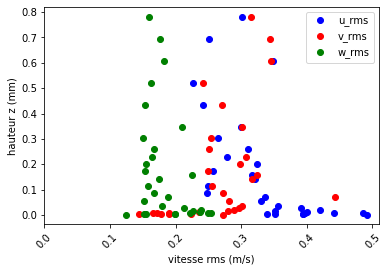

In [9]:
file_path = file0+"_rms.pdf"
#file_path = 'l13_07h13_rms.pdf'
fig = plt.figure()
plt.plot(urms,zcobra,'bo', label='u_rms')
plt.plot(vrms,zcobra,'ro', label='v_rms')
plt.plot(wrms,zcobra,'go', label='w_rms')
plt.xlabel('vitesse rms (m/s)')
plt.ylabel('hauteur z (mm)')
zmin=0
plt.xlim(zmin)
plt.legend()
plt.xticks(rotation=45)
fig.savefig(file_path, bbox_inches='tight')

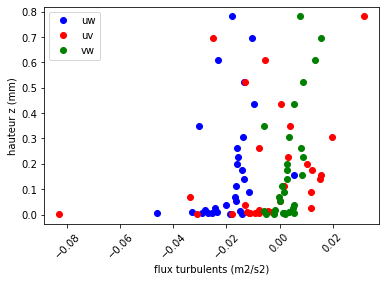

In [10]:
file_path = file0+"_flux.pdf"
#file_path = 'l13_09h21_flux.pdf'
#uw=uw/ukat
#uw=uw*ukat
fig = plt.figure()
plt.plot(uw,zcobra,'bo', label='uw')
plt.plot(uv,zcobra,'ro', label='uv')
plt.plot(vw,zcobra,'go', label='vw')
plt.xlabel('flux turbulents (m2/s2)')
plt.ylabel('hauteur z (mm)')
plt.legend()
plt.xticks(rotation=45)
fig.savefig(file_path, bbox_inches='tight')
#print(uw[21])

utau= 0.16429543974104893
zo+= 2.1906058632139858
log ks+= 1.8176855004551482


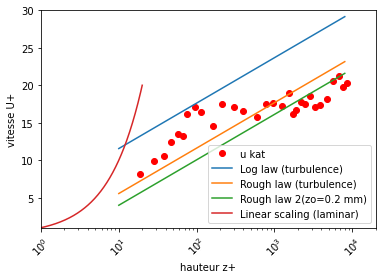

In [36]:
file_path = file0+"_log.pdf"
#file_path = 'l13_09h21_log.pdf'
nu=15.e-6
kappa=0.38
Clog=5.5
utau=np.sqrt(-uw[0])
utau=np.sqrt(-uw[3])
#utau=0.2
print("utau=",utau)
Uplus=ukat/utau
zplus=zcobra*utau/nu
fig = plt.figure()
plt.semilogx(zplus, Uplus,'ro', label='u kat')
plt.ylabel('vitesse U+')
plt.xlabel('hauteur z+')
z = np.linspace(10,8000,1000)
x = np.linspace(0.1,20,1000)
loilog = 1./kappa*np.log(z) + Clog
zo=0.2e-3
zoplus=zo*utau/nu
print("zo+=",zoplus)
print("log ks+=",np.log10(30*zoplus))
Crug=4.5
Crug=6
z2=nu*z/utau
loilog2 = 1./kappa*np.log(z2/zo)
plt.semilogx(z,loilog,label='Log law (turbulence)')
plt.semilogx(z,loilog-Crug,label='Rough law (turbulence)')
plt.semilogx(z,loilog2,label='Rough law 2(zo=0.2 mm)')
plt.semilogx(x,x, label='Linear scaling (laminar)')
zmin=1
zmax=2.e4
plt.xlim(zmin,zmax)
umin=1
umax=30
plt.ylim(umin,umax)
plt.legend()
plt.xticks(rotation=45)
fig.savefig(file_path, bbox_inches='tight')

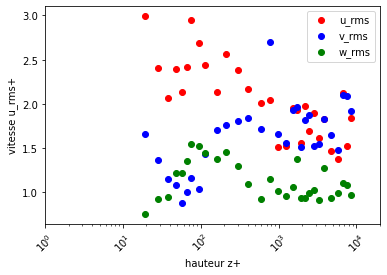

In [44]:
file_path = file0+"_rms_log.pdf"
uplus=urms/utau
vplus=vrms/utau
wplus=wrms/utau
#zplus=zcobra*utau/nu
fig = plt.figure()
plt.semilogx(zplus, uplus,'ro', label='u_rms')
plt.semilogx(zplus, vplus,'bo', label='v_rms')
plt.semilogx(zplus, wplus,'go', label='w_rms')
plt.ylabel('vitesse u_rms+')
plt.xlabel('hauteur z+')
z = np.linspace(10,8000,1000)
x = np.linspace(0.1,20,1000)
zmin=1
zmax=2.e4
plt.xlim(zmin,zmax)
#umin=1
#umax=30
#plt.ylim(umin,umax)
plt.legend()
plt.xticks(rotation=45)
fig.savefig(file_path, bbox_inches='tight')

0.6149154974489796


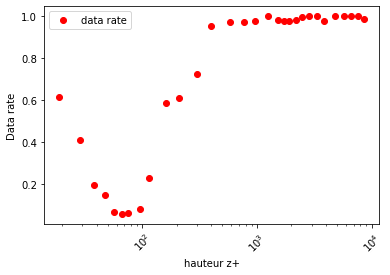

In [45]:
file_path = file0+"_DR.pdf"
#file_path = 'l13_09h21_DR.pdf'
fig = plt.figure()
plt.semilogx(zplus, datarate,'ro', label='data rate')
plt.ylabel('Data rate')
plt.xlabel('hauteur z+')
#plt.ylim(umin,umax)
plt.legend()
plt.xticks(rotation=45)
fig.savefig(file_path, bbox_inches='tight')
print(datarate[0])

/var/folders/j9/b9q3z_ld41jcr1wz5vktrv2w0000t1/T/ipykernel_3461/1927514028.py:7: RuntimeWarning: invalid value encountered in sqrt
  utau=np.sqrt(-uw)


[0.1186575816375786 0.13554094632212016 0.1365091606617577
 0.16429543974104893 0.15946798285383929 0.17051145005802357
 0.21521403486937477 0.18148328106807232 0.15299270535603104
 0.12226120445303482 0.168101662192684 0.156353027410277
 0.14159270160255874 0.12791312094404014 0.13011996205616883
 0.10676986795373702 0.12792296084292787 0.11528236004380676 --
 0.11918971942415568 0.1259335131500652 0.1265860936003631
 0.1250444723052357 0.1170554094211862 0.1739344107909989
 0.09878893207831077 0.11503881803603652 0.15179412794964867
 0.1026657909995322 0.13325180230372483]


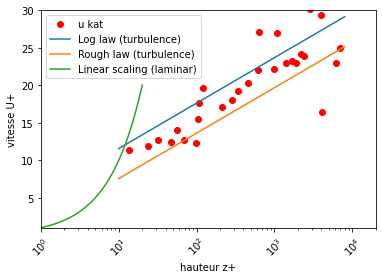

In [46]:
file_path = file0+"_local.pdf"
#file_path = 'l13_09h21_local.pdf'
nu=15.e-6
kappa=0.38
Clog=5.5
#zplus=(np.array(zcobra)+2)/1000
utau=np.sqrt(-uw)
#zplus=zcobra*utau/nu
#print(zplus)
print(utau)
#utau=0.2
Uplus=ukat/utau
zplus=zcobra*utau/nu
fig = plt.figure()
plt.semilogx(zplus, Uplus,'ro', label='u kat')
plt.ylabel('vitesse U+')
plt.xlabel('hauteur z+')
z = np.linspace(10,8000,1000)
x = np.linspace(0.1,20,1000)
loilog = 1./kappa*np.log(z) + Clog
plt.semilogx(z,loilog,label='Log law (turbulence)')
plt.semilogx(z,loilog-4,label='Rough law (turbulence)')
plt.semilogx(x,x, label='Linear scaling (laminar)')
zmin=1
zmax=2.e4
plt.xlim(zmin,zmax)
umin=1
umax=30
plt.ylim(umin,umax)
plt.legend()
plt.xticks(rotation=45)
fig.savefig(file_path, bbox_inches='tight')

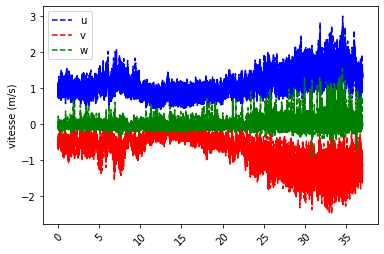

In [47]:
file_path = file0+"_sample.pdf"
#file_path = 's11_07h56_y_700m.pdf'
fig = plt.figure()
#series = pd.Series(vitesse,index=time_meteo)
#series = series.sort_index()
#T1h = series.resample('1H').mean()
#plt.plot(time_meteo, temperature_surf,'r*', label='T surf')
plt.plot(time,u,'b--', label='u')
plt.plot(time,v,'r--', label='v')
plt.plot(time,w,'g--', label='w')
plt.ylabel('vitesse (m/s)')
plt.legend()
plt.xticks(rotation=45)
fig.savefig(file_path, bbox_inches='tight')

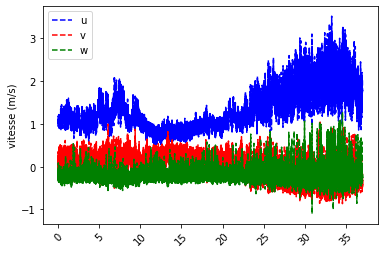

In [48]:
file_path = file0+"_streamline.pdf"
#file_path = 's11_07h56_y_700p.pdf'
fig = plt.figure()
#series = pd.Series(vitesse,index=time_meteo)
#series = series.sort_index()
#T1h = series.resample('1H').mean()
#plt.plot(time_meteo, temperature_surf,'r*', label='T surf')
plt.plot(time,uk,'b--', label='u')
plt.plot(time,vk,'r--', label='v')
plt.plot(time,wk,'g--', label='w')
plt.ylabel('vitesse (m/s)')
plt.legend()
plt.xticks(rotation=45)
fig.savefig(file_path, bbox_inches='tight')

/var/folders/j9/b9q3z_ld41jcr1wz5vktrv2w0000t1/T/ipykernel_3461/3590623092.py:9: RuntimeWarning: divide by zero encountered in power
  y=(f)**(-5/3)*0.06
/var/folders/j9/b9q3z_ld41jcr1wz5vktrv2w0000t1/T/ipykernel_3461/3590623092.py:10: RuntimeWarning: divide by zero encountered in power
  y2=(f)**(-3)*50


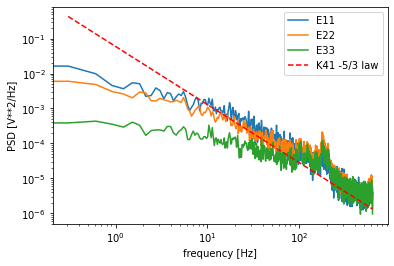

In [49]:
file_path = file0+"_spectre.pdf"
#file_path = 's11_07h56_y_700s.pdf'
fig = plt.figure()
Nspec=2048
Nspec=4096
f, Pxx_den = signal.welch(uk, freq, nperseg=Nspec)
f, Pyy_den = signal.welch(vk, freq, nperseg=Nspec)
f, Pzz_den = signal.welch(wk, freq, nperseg=Nspec)
y=(f)**(-5/3)*0.06
y2=(f)**(-3)*50
plt.loglog(f, Pxx_den, label = 'E11')
plt.loglog(f, Pyy_den, label = 'E22')
plt.loglog(f, Pzz_den, label = 'E33')
plt.loglog(f, y, 'r--', label='K41 -5/3 law')
#plt.loglog(f, y2, 'g--', label='-3 law')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.show()
fig.savefig(file_path, bbox_inches='tight')

In [82]:
alpha=np.arctan(vmean/umean)
#alpha=0.
vkat=-np.array(u)*np.sin(alpha)+np.array(v)*np.cos(alpha)
ukat=np.array(u)*np.cos(alpha)+np.array(v)*np.sin(alpha)
ukmean=np.mean(ukat)
vkmean=np.mean(vkat)
beta=np.arctan(wmean/ukmean)
gamma=np.arctan(wmean/vmean)
#beta=0.
wkat=-ukat*np.sin(beta)+np.array(w)*np.cos(beta)
ukat2=ukat*np.cos(beta)+np.array(w)*np.sin(beta)
ukmean=np.mean(ukat2)
wkmean=np.mean(wkat)
up=ukat2-ukmean
vp=vkat-vkmean
wp=wkat-wkmean
u2=np.mean(up**2)
v2=np.mean(vp**2)
w2=np.mean(wp**2)
urms=np.sqrt(u2)
vrms=np.sqrt(v2)
wrms=np.sqrt(w2)
uw=np.mean(up*wp)
uv=np.mean(up*vp)
vw=np.mean(vp*wp)
#uw=-0.03
#ukmean=2.
utau=np.sqrt(-uw)
#vtau=np.sqrt(-vw)
#utau=np.sqrt(utau**2+vtau**2)
uplus=ukmean/utau
z=900.e-3
nu=15.e-6
zplus=z*utau/nu
print(alpha*180/np.pi)
print(beta*180/np.pi)
print(gamma*180/np.pi)
print(ukmean)
print(vkmean)
print(wkmean)
print(urms)
print(vrms)
print(wrms)
print(uw)
print(uv)
print(vw)
print(utau)
print(uplus)
print(zplus)

ValueError: operands could not be broadcast together with shapes (75263,) (21,) 

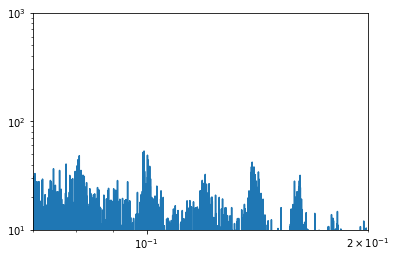

[-7.31592564e-12  2.47434138e+03 -3.56166288e+03 ... -9.56772095e+02
 -3.56166288e+03  2.47434138e+03]
[-8.88178420e-14  5.35381044e+03  4.98513598e+02 ... -1.20847334e+04
 -4.98513598e+02 -5.35381044e+03]


In [83]:
fig = plt.figure()
sp = np.fft.fft(up)
f2 = np.fft.fftfreq(time.shape[-1])
#plt.plot(f2, sp.real, f2, sp.imag)
plt.loglog(f2, sp.real, label = 'fft real')
tmin=0.07
tmax=0.2
#plt.legend()
plt.xlim(tmin,tmax)
plt.ylim(10,1.e3)
plt.show()
print(sp.real)
print(sp.imag)
fig.savefig('fft.pdf', bbox_inches='tight')

In [84]:
tfup=sp
print(tfup)
#tfup(0.08)=0.
m=8*750-7
m=8*750-100
for i in range(300):
    tfup[m-150+i]=0.

[-7.31592564e-12-8.88178420e-14j  2.47434138e+03+5.35381044e+03j
 -3.56166288e+03+4.98513598e+02j ... -9.56772095e+02-1.20847334e+04j
 -3.56166288e+03-4.98513598e+02j  2.47434138e+03-5.35381044e+03j]


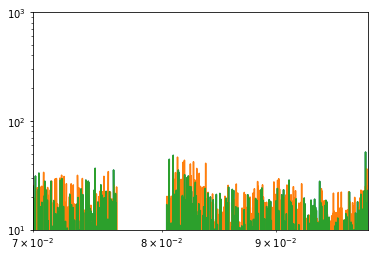

In [85]:
fig = plt.figure()
#sp = np.fft.fft(up)
#f2 = np.fft.fftfreq(time.shape[-1])
plt.plot(f2, tfup.real, f2, sp.imag)
plt.loglog(f2, tfup.real, label = 'fft real')
tmin=0.07
tmax=0.099
#plt.legend()
plt.xlim(tmin,tmax)
plt.ylim(10,1.e3)
plt.show()
fig.savefig('fft2.pdf', bbox_inches='tight')

/Applications/anaconda3/lib/python3.9/site-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


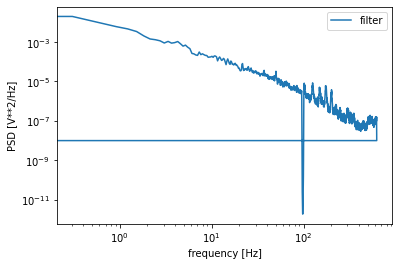

In [86]:
fig = plt.figure()
up_fil = np.fft.ifft(tfup)
Nspec=4096
f3, Pfilt_den = signal.welch(up_fil, freq, nperseg=Nspec)
plt.loglog(f3, Pfilt_den, label = 'filter')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.show()
fig.savefig('spec_filtre.pdf', bbox_inches='tight')

In [87]:
urms2=np.sqrt(np.mean(up_fil**2))
print(urms2)
print(urms)

(0.38560044215607286-4.76875750923997e-19j)
[0.43114408 0.40437748 0.35726598 0.48168882 0.3517833  0.35291129
 0.40117376 0.33639477 0.31411848 0.40553172 0.36635003 0.35302035
 0.34743593 0.31780913 0.28472182 0.40584596 0.31398678 0.2736478
 0.42507028 0.38167734 0.38565172]


In [88]:
for i in range(60000):
    tfup[m+i]=0
up_fil = np.fft.ifft(tfup)
urms3=np.sqrt(np.mean(up_fil**2))
print(urms3)
print(urms)

(0.3849099041854786-4.421619147839191e-19j)
[0.43114408 0.40437748 0.35726598 0.48168882 0.3517833  0.35291129
 0.40117376 0.33639477 0.31411848 0.40553172 0.36635003 0.35302035
 0.34743593 0.31780913 0.28472182 0.40584596 0.31398678 0.2736478
 0.42507028 0.38167734 0.38565172]


/Applications/anaconda3/lib/python3.9/site-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


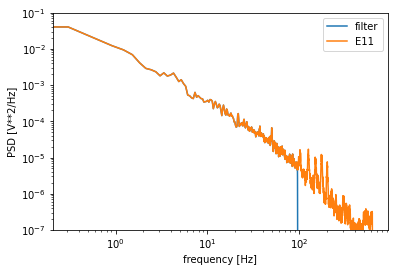

In [96]:
fig = plt.figure()
up_fil = np.sqrt(2)*np.fft.ifft(tfup)
Nspec=4096
f4, Pfilt_den = signal.welch(up_fil, freq, nperseg=Nspec)
plt.loglog(f4, Pfilt_den, label = 'filter')
plt.loglog(f, Pxx_den, label = 'E11')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
emin=1e-7
emax=0.1
#plt.legend()
plt.ylim(emin,emax)
plt.legend()
plt.show()
fig.savefig('spec_filtre2.pdf', bbox_inches='tight')